In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
df = pd.read_csv("Set 4-countrywise_corona.csv")

# viewing the dataset
print("Dataset Loaded", df.shape)
df.head()

Dataset Loaded (187, 15)


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263.0,1269.0,25198.0,9796.0,106.0,10.0,18.0,3.50,69.49,5.04,35526.0,737.0,2.07,Eastern Mediterranean
1,Albania,4880.0,144.0,2745.0,1991.0,117.0,6.0,63.0,2.95,56.25,5.25,4171.0,709.0,17.00,Europe
2,Algeria,27973.0,1163.0,18837.0,7973.0,616.0,8.0,749.0,4.16,67.34,NaN,23691.0,4282.0,18.07,Africa
3,Andorra,907.0,52.0,803.0,52.0,10.0,0.0,0.0,5.73,88.53,6.48,884.0,NaN,2.60,Europe
4,Angola,950.0,41.0,242.0,667.0,18.0,1.0,0.0,4.32,25.47,16.94,749.0,201.0,26.84,Africa


In [39]:

# make the dataset into proper classification
classification = {}
for col in df.columns:
    if df[col].dtype == 'object':
        classification[col] = 'Nominal (Categorical)'
    else:
        classification[col] = 'Ratio (Numeric Count or Rate)'
pd.DataFrame.from_dict(classification, orient='index', columns=['Data Type'])

,Data Type
Country/Region,Nominal (Categorical)
Confirmed,Ratio (Numeric Count or Rate)
Deaths,Ratio (Numeric Count or Rate)
Recovered,Ratio (Numeric Count or Rate)
Active,Ratio (Numeric Count or Rate)
New cases,Ratio (Numeric Count or Rate)
New deaths,Ratio (Numeric Count or Rate)
New recovered,Ratio (Numeric Count or Rate)
Deaths / 100 Cases,Ratio (Numeric Count or Rate)
Recovered / 100 Cases,Ratio (Numeric Count or Rate)


In [40]:
# statistics of the dataset
region_col = 'WHO Region' if 'WHO Region' in df.columns else df.columns[1]
for col in ['Confirmed', 'Deaths']:
    print(f"\nSummary statistics for {col} by {region_col}")
    print(df.groupby(region_col)[col].agg(['count','mean','median','std','min','max']).round(2))


Summary statistics for Confirmed by WHO Region
                       count       mean   median        std    min        max
WHO Region                                                                   
Africa                    39    6349.44   2328.0    9496.19   10.0    41180.0
Americas                  33  267851.09  15035.0  839735.81   17.0  4290259.0
Eastern Mediterranean     19   56459.53  11424.0   87478.93  674.0   293606.0
Europe                    55   59972.05  13761.0  128153.27   12.0   816680.0
South-East Asia            8   31865.12   3051.0   78773.20   24.0   226225.0
Western Pacific           16   18276.75   1009.5   29427.55   20.0    86783.0

Summary statistics for Deaths by WHO Region
                       count      mean  median       std   min       max
WHO Region                                                              
Africa                    43    115.19    45.0    220.22   0.0    1163.0
Americas                  33  10385.58   146.0  29894.59   0.0  

In [41]:
print("\ndata cleaning")
#cleaning the dataset and finding the missing values
print("Missing values before:\n", df.isnull().sum())

# Convert numerics
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[num_cols] = df[num_cols].abs()
df = df.drop_duplicates()
df[num_cols] = df[num_cols].fillna(0)
print("Missing values after:\n", df.isnull().sum())


data cleaning
Missing values before:
 Country/Region            9
Confirmed                 9
Deaths                    9
Recovered                 9
Active                    9
New cases                 9
New deaths                9
New recovered             9
Deaths / 100 Cases        9
Recovered / 100 Cases     9
Deaths / 100 Recovered    9
Confirmed last week       9
1 week change             9
1 week % increase         9
WHO Region                9
dtype: int64
Missing values after:
 Country/Region            9
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                9
dtype: int64


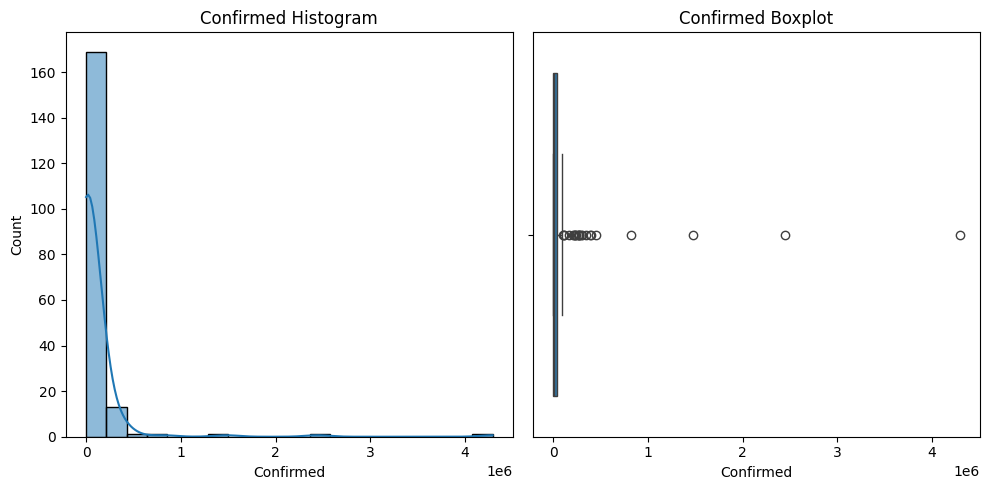

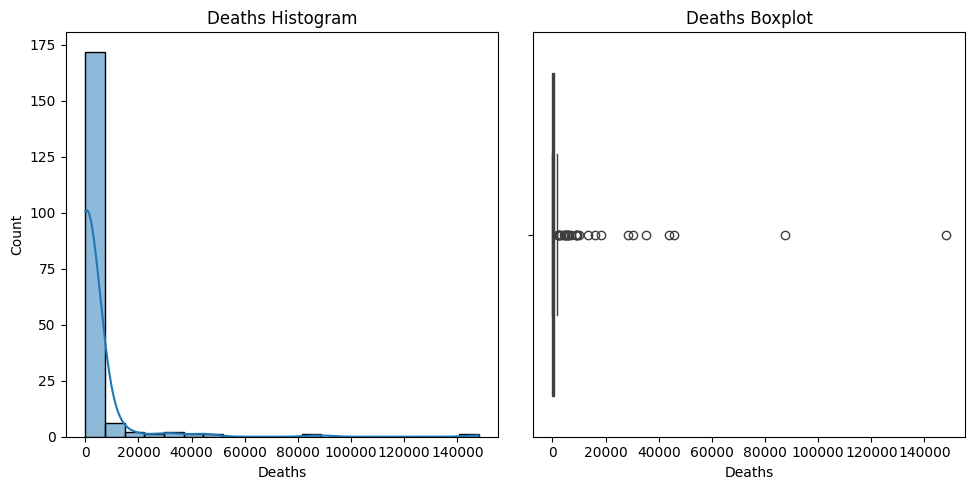

In [42]:
#printing all that plots mentioned
for col in ['Confirmed', 'Deaths']:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"{col} Histogram")
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.tight_layout()
    plt.show()


Confirmed Outliers count: 23


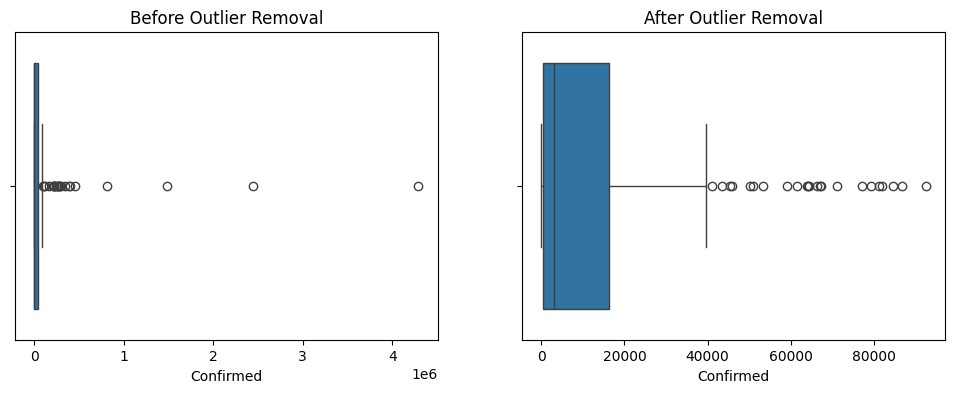

In [43]:
#finding the outlier
col = 'Confirmed'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
outliers = df[(df[col] < lower) | (df[col] > upper)]
print(f"\n{col} Outliers count:", outliers.shape[0])

# Before and after boxplots
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=df[col]); plt.title("Before Outlier Removal")
plt.subplot(1,2,2)
sns.boxplot(x=df[(df[col] >= lower) & (df[col] <= upper)][col])
plt.title("After Outlier Removal")
plt.show()

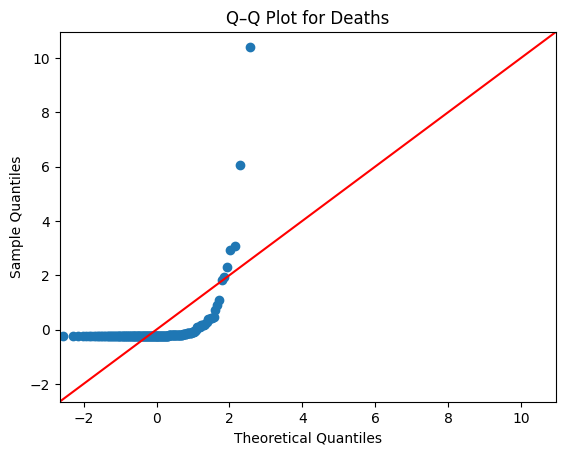

In [44]:
#q-q plot for the people death
sm.qqplot(df['Deaths'], line='45', fit=True)
plt.title("Q–Q Plot for Deaths")
plt.show()


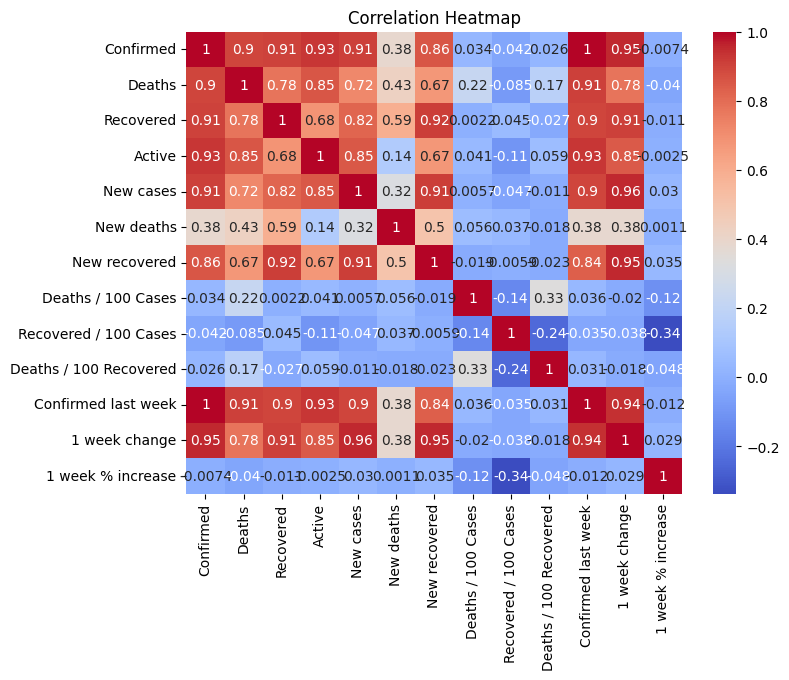


Correlation with Deaths:
 Deaths                    1.000000
Confirmed last week       0.908339
Confirmed                 0.899016
Active                    0.853915
Recovered                 0.780333
1 week change             0.776430
New cases                 0.719332
New recovered             0.672841
New deaths                0.427399
Deaths / 100 Cases        0.222258
Deaths / 100 Recovered    0.172799
1 week % increase        -0.039942
Recovered / 100 Cases    -0.084756
Name: Deaths, dtype: float64


In [45]:
#correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

corr_with_deaths = df.corr(numeric_only=True)['Deaths'].sort_values(ascending=False)
print("\nCorrelation with Deaths:\n", corr_with_deaths)

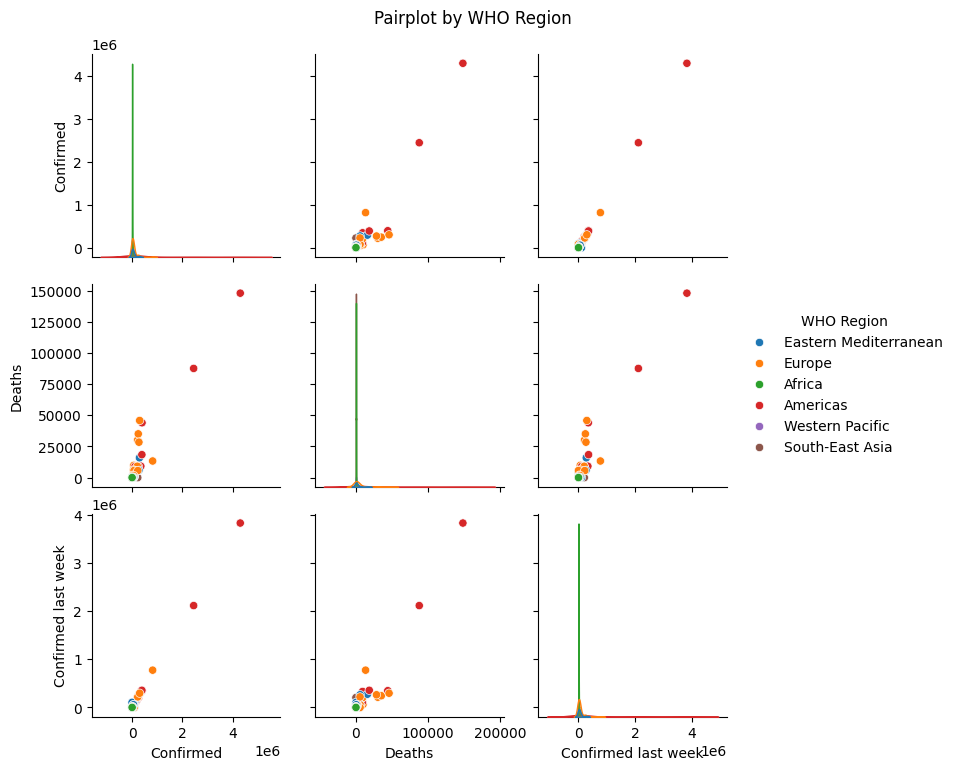

In [46]:
#making the pairplot for Confirmed, Deaths, and Confirmed last week, coloured by WHO Region
cols = [c for c in df.columns if 'Confirmed' in c or c == 'Deaths']
cols = [c for c in cols if c in df.columns][:3]
sns.pairplot(df, vars=cols, hue=region_col)
plt.suptitle("Pairplot by WHO Region", y=1.02)
plt.show()


In [47]:
# t-test: Compare mean Deaths between the two regions
regions = df[region_col].dropna().unique()
if len(regions) >= 2:
    r1, r2 = regions[:2]
    grp1 = df[df[region_col]==r1]['Deaths']
    grp2 = df[df[region_col]==r2]['Deaths']
    tstat, pval = stats.ttest_ind(grp1, grp2, equal_var=False, nan_policy='omit')
    print(f"\nT-Test between {r1} and {r2} on Deaths:")
    print(f"T-Statistic: {tstat:.3f}, P-Value: {pval:.4f}")
else:
    print("Not enough regions for t-test")

# taking MOE as 95%
mean_deaths = df['Deaths'].mean()
std_deaths = df['Deaths'].std()
n = df['Deaths'].count()
se = std_deaths/np.sqrt(n)
moe = stats.t.ppf(0.975, n-1)*se
print(f"\nMean Deaths = {mean_deaths:.2f} ± {moe:.2f} (95% CI)")

# 95% C.Ifirst WHO region
if len(regions) > 0:
    r = regions[0]
    data = df[df[region_col]==r]['Confirmed']
    if len(data)>1:
        ci = stats.t.interval(0.95, len(data)-1, loc=data.mean(), scale=stats.sem(data))
        print(f"95% CI for mean Confirmed in {r}: {ci}")
    else:
        print(f"Not enough data for CI in region: {r}")


T-Test between Eastern Mediterranean and Europe on Deaths:
T-Statistic: -1.445, P-Value: 0.1527

Mean Deaths = 3297.62 ± 2010.04 (95% CI)
95% CI for mean Confirmed in Eastern Mediterranean: (np.float64(12523.082670773001), np.float64(89641.77447208414))



Regression Performance:
MSE=27502536.50
RMSE=5244.29
R²=0.6158


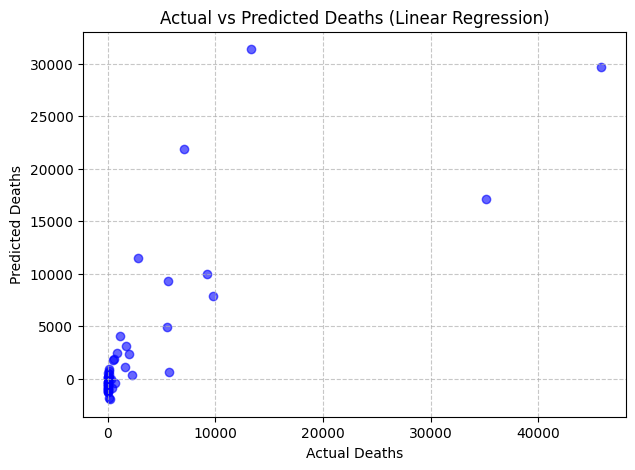

In [48]:
df_model = df.copy()
df_model = df_model.drop(columns=['Country/Region'], errors='ignore')

region_col = 'WHO Region'
if region_col in df_model.columns:
    df_model = pd.get_dummies(df_model, columns=[region_col], drop_first=True)

y = df_model['Deaths']
X = df_model.drop(columns=['Deaths'])

X = X.select_dtypes(include=[np.number])
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(0)

X = X.clip(lower=-1e9, upper=1e9)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nRegression Performance:\nMSE={mse:.2f}\nRMSE={rmse:.2f}\nR²={r2:.4f}")

# Ploting 
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Deaths")
plt.ylabel("Predicted Deaths")
plt.title("Actual vs Predicted Deaths (Linear Regression)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
